# Восстановление золота из руды

В данном проекте необходимо разарботать модель, которая будет предсказывать коэффициент восстановления золота, с целью оптимизации производства. Сам процесс восстановления золота сложный и происходит в несколько этапов:

1. Флотация (в ходе него получают черновой концентрат);
2. Двухэтапная очистка (в ходе данного этапа получают уже финальный концентрат).

Данная задача является задачей регрессии. отрослеву специфику в качестве метрики качества необходимо использовать симметричное среднее абсолютное процентное отклонение (sMAPE). Приэтом итоговый показатель будет состоять из суммы 25% sMAPE на флотации и 75% sMAPE на этапе очистки.

В данной работе нам потребуется:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первичное-изучение-данных" data-toc-modified-id="Первичное-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первичное изучение данных</a></span></li><li><span><a href="#Проверка-рассчёта-эффективности" data-toc-modified-id="Проверка-рассчёта-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка рассчёта эффективности</a></span></li><li><span><a href="#Анализ-тестовой-выборки-и-заполнение-пропусков" data-toc-modified-id="Анализ-тестовой-выборки-и-заполнение-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ тестовой выборки и заполнение пропусков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-концентрации-металов-на-различных-этапах-очистки" data-toc-modified-id="Изучение-концентрации-металов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение концентрации металов на различных этапах очистки</a></span></li><li><span><a href="#Изучение-размеров-гранул-сырья-на-тестовой-и-обучающей-выборке" data-toc-modified-id="Изучение-размеров-гранул-сырья-на-тестовой-и-обучающей-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение размеров гранул сырья на тестовой и обучающей выборке</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ-на-различных-стадиях-обогощения" data-toc-modified-id="Исследование-суммарной-концентрации-веществ-на-различных-стадиях-обогощения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ на различных стадиях обогощения</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-рассчёта-итоговой-sMAPE" data-toc-modified-id="Создание-функции-для-рассчёта-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции для рассчёта итоговой sMAPE</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Выбор-целей-и-признаков" data-toc-modified-id="Выбор-целей-и-признаков-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Выбор целей и признаков</a></span></li><li><span><a href="#Dummy-модель" data-toc-modified-id="Dummy-модель-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Dummy модель</a></span></li><li><span><a href="#Выбор-модели-для-операции-флотации" data-toc-modified-id="Выбор-модели-для-операции-флотации-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Выбор модели для операции флотации</a></span></li><li><span><a href="#Выбор-модели-для-финального-перехода" data-toc-modified-id="Выбор-модели-для-финального-перехода-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Выбор модели для финального перехода</a></span></li><li><span><a href="#Финальная-модель" data-toc-modified-id="Финальная-модель-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Финальная модель</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

from catboost import CatBoostRegressor
from catboost import cv
from catboost import Pool

import time

### Первичное изучение данных

Выведем информацию по исходным данным.

In [2]:
data_full = pd.read_csv('gold_recovery_full_new.csv')
display (data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
print (data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Выведем информацию по тренировочной выборке.

In [4]:
data_train = pd.read_csv('gold_recovery_train_new.csv')
display (data_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
print (data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Выведем информацию по тестовой выборке

In [6]:
data_test = pd.read_csv('gold_recovery_test_new.csv')
display (data_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
print (data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Все столбцы в датасетах, кроме одного имеют формат float64. Также во всех столбцах есть пропуски и их нужно будет обработать в дальнейшем. Кроме того необходимо привести в нормальный вид формат времени

In [8]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

### Проверка рассчёта эффективности

Поскольку показатель эффективности рассчитывается на основе данных датасета, то проверим его корректность и расчитаем эффективность обогощения на обучающей выборке.

In [9]:
C = data_train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
F = data_train['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
T = data_train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки

data_train['recovery'] = ( C * (F - T))/(F * (C - T)) * 100

Расчитаем MAE по полученному признаку.

In [10]:
MAE = np.sum(abs(data_train['rougher.output.recovery'] - data_train['recovery']))
MAE

1.3774226204077422e-10

MAE между эффективностью обогощения рассчитанное нами и полученое из данных крайне мало, вероятнее всего оно может быть связано с округлениями в процессе рассчёта. Соответственно можно сделать вывод, что данный признак в датасете посчитан верно

### Анализ тестовой выборки и заполнение пропусков

Проанализируем данные пропущенные в тестовой выборке. Для начало выведим количество пропущенных значений в датасете

In [11]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Пропуски в данных встречаются более чем в 10 столбцах. выведем строки с пропусками. Больше всего пропусков (более 40) на тестовой выборке относится к процессу флотации

Выведем строчки где есть хотя бы одно пропущенное значение

In [12]:
pd.set_option('display.max_columns', None)
display(data_test[data_test.isna().any(1)])

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
30,2016-09-02 06:59:59,NaN,NaN,7.1600,NaN,4.126292e+02,-795.316337,4.137033e+02,-787.396567,4.416043e+02,-799.942901,2.779496e+02,-799.760111,0.568441,0.273677,0.185161,73.863127,3.091118,0.568632,NaN,0.005559,0.002121,0.017055,802.900908,-522.987484,900.542913,-650.245277,1005.732206,-439.919433,1009.700913,-619.995695,676.186135,-649.267537,617.387077,-445.400385,15.220105,-725.426349,6.004391,-788.919901,0.000000e+00,-796.177023,6.203523e+00,-660.374105,6.576244e+00,-616.550019,4.625908e+00,-678.347958,4.451592,-795.337422,3.544708,-800.024373,5.914889,-799.501783
31,2016-09-02 10:59:59,64.558863,0.061864,7.1095,0.520084,1.433955e+03,-499.688476,1.553150e+03,-500.878552,1.517895e+03,-507.108257,1.124912e+03,-498.156657,8.138400,3.903507,485.929637,70.322458,44.276094,8.144801,9.435013,5.278592,9.081144,5.284294,1000.270639,-349.387437,1250.841286,-399.344115,1249.962813,-398.580569,1199.336006,-402.251450,997.504708,-400.750459,948.095197,-397.325402,25.097560,-499.829794,12.029984,-500.482332,NaN,-501.187631,1.200799e+01,-506.368820,1.199375e+01,-499.148736,8.129055e+00,-500.125308,8.031323,-486.756657,5.047491,-467.938124,10.047098,-499.813489
32,2016-09-02 11:59:59,112.768923,6.061414,6.1500,0.819723,1.426909e+03,-500.749720,1.544540e+03,-501.570124,1.509087e+03,-504.328580,1.155663e+03,-498.748072,8.521644,3.885984,500.159628,77.206635,44.894493,8.156237,10.005237,5.591944,9.996164,5.598313,1000.678350,-350.181882,1249.590770,-401.880130,1249.794934,-402.143991,1203.829277,-401.651676,1000.538808,-401.464829,950.120669,-401.253866,25.114399,-500.224823,11.973063,-499.875561,NaN,-500.770087,1.201216e+01,-500.548062,1.205734e+01,-501.795391,8.100986e+00,-501.032511,8.053520,-506.002857,5.025161,-447.918397,9.911242,-497.922919
33,2016-09-02 12:59:59,132.526641,8.257739,6.6715,0.803072,1.419082e+03,-499.519835,1.530869e+03,-499.749240,1.494243e+03,-499.770361,1.077569e+03,-499.811063,8.544087,3.942040,494.430227,74.223202,45.660274,8.283520,10.006594,5.600524,10.006470,5.601279,999.592488,-349.874866,1248.339846,-398.963858,1247.309356,-399.529153,1197.350029,-398.536292,1000.3187

Данные встречаются в разных столбцах и не коррелируются по времени. Вероятнее всего имеет место ошибка при передаче данных. однако эти пропуски как в тестовой так и в тренировочной выборке необходимо заполнить, иначе в процессе обучекния модели мы получим ошибку. Учитывая, что данные в датасете отсоротированны по времени, заполнять данные будеим ближайшим более ранним значением. для этого передадим в метод fillna() аргумент method = 'pad'.

In [13]:
data_train = data_train.fillna(method='pad')
data_test = data_test.fillna(method='pad')

### Выводы

На данном этапе была проведена предообработка данных в ходе которой сделано следующее:

    1. Открыты и изучены исходные данные, изменён формат даты.
    2. Проведёна проверка правильности рассчёта эффективности обогощения для признака rougher.output.recovery, в ходе которой установлено, что эффективность рассчитана корректно.
    3. Заполнены пропуски в обучающей и тестовой выборке.

## Анализ данных

### Изучение концентрации металов на различных этапах очистки

Изучим концентрацию металлов на различных этапах очистики, чтобы упростить процесс напишем функцию, которая будет принимать на вход датасет, список столбцов, название диаграммы, подписи по оси х, и будет строить даннуб диаграмму.

In [14]:
def concenntrate_hist (data, columns, name_titel, name_colomns):
    list_for_hist = []
    
    for column in columns:
        list_for_hist.append(data[column].mean())
        
    plt.figure (figsize=(12,6))     
    plt.title(name_titel)
    plt.bar(columns, list_for_hist)
    plt.ylabel('Концентрация')
    plt.xticks(columns, name_colomns)
    plt.xlabel('Технологические этапы')
    plt.show()

Начнём с целевого металла - золота (Au) для этого составим список столбцов указывающих на количество золота на входе флотация и далее на выходе из каждой операции.

In [15]:
columns_au = (['rougher.input.feed_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
              'rougher.output.tail_au'])
name_colomns =(['Флотация (вход)', 'Первичная очистка', 'Финальные значения', 'Отвальные хвосты после флотации'])

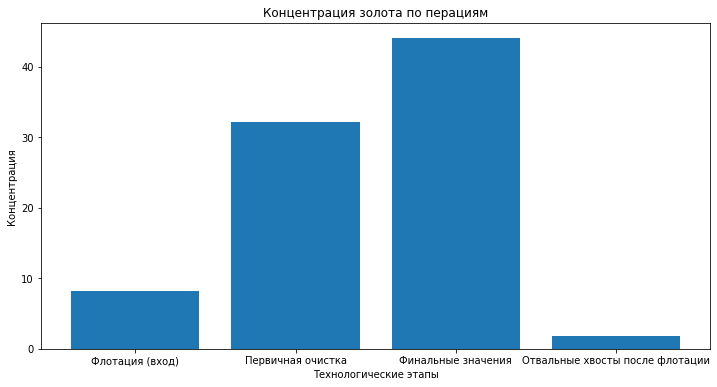

In [16]:
concenntrate_hist(data_full, columns_au, 'Концентрация золота по перациям', name_colomns)

Рассмотрим изменение концентрации серебра (Ag)

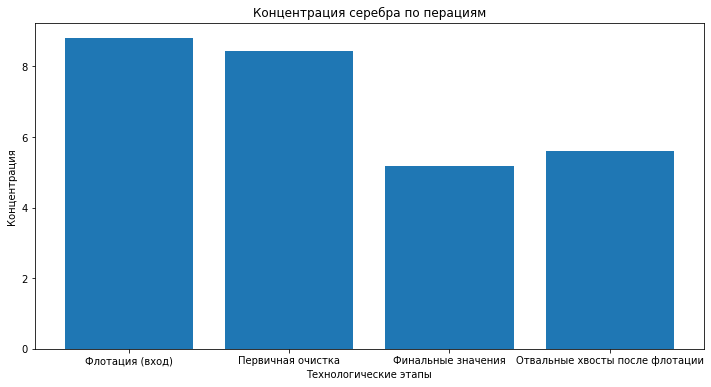

In [17]:
columns_ag = ([ 'rougher.input.feed_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
              'rougher.output.tail_ag'])

concenntrate_hist(data_full, columns_ag, 'Концентрация серебра по перациям', name_colomns)

Рассмотрим изменение концентрации свинца (Pb)

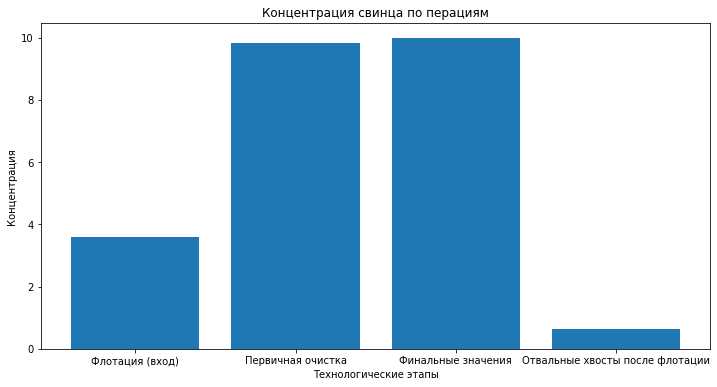

In [18]:
columns_pb = ([ 'rougher.input.feed_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
              'rougher.output.tail_pb'])
concenntrate_hist(data_full, columns_pb, 'Концентрация свинца по перациям', name_colomns)

Из полученных гистограмм видно, что после этапа флотации повышается концентрация золота и свинца повышается, а концентрация свинца падает. Также стоит отметить, что в отвальных хвостах содержится около 3 единиц золота, 5,5 единиц серебра и 0,5 свинца. В результате, не мсотря на то, что после финального этапа восстановления в сырье помимо золоа содержаться  и другие металлы, но их содержание  значительно меньше чем у золота (около 10 единиц свинца, 5,5 единиц серебра, на 43 единицы золота в среднем). 

### Изучение размеров гранул сырья на тестовой и обучающей выборке

Рассмотрим размеры гранул сырья на тестовой и обучающей выборке, чтобы убедиться, что в данных условиях обученная модель будет давать результат близкий к реальности. Построим гистограммы для данного признака в обеих выборках.

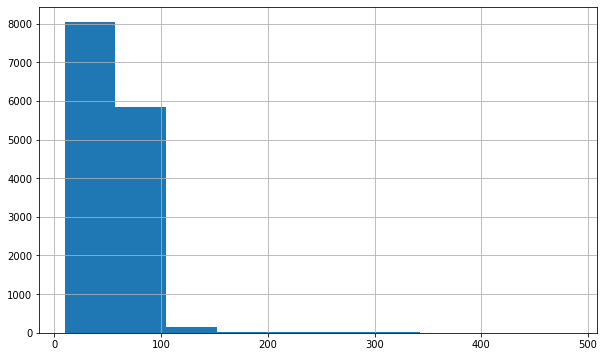

In [19]:
plt.figure (figsize=(10,6))    
plt.hist(data_train['rougher.input.feed_size']) 
plt.grid()
plt.show()

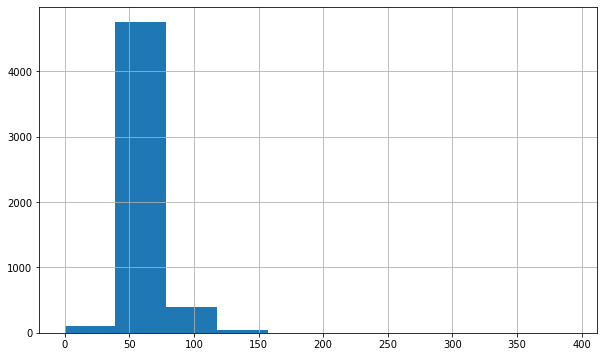

In [20]:
plt.figure (figsize=(10,6))    
plt.hist(data_test['rougher.input.feed_size']) 
plt.grid()
plt.show()

В обоих выборках основная часть гранул имеет размерменьше 120, поэтому можно сделать вывод, что машинное обучение позволит получить правдивые результаты

### Исследование суммарной концентрации веществ на различных стадиях обогощения

Изучим сумарную концентрацию веществ на различных этапах производства для этого добавим дополнительные столбцы с суммой концентрации

In [21]:
data_full['rougher.output.concentrate_all'] = (
    data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] +
    data_full['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']
)

data_full['primary_cleaner.output.concentrate_all'] = (
    data_full['primary_cleaner.output.concentrate_ag'] + data_full['primary_cleaner.output.concentrate_pb'] +
    data_full['primary_cleaner.output.concentrate_sol'] + data_full['primary_cleaner.output.concentrate_au']
)

data_full['final.output.concentrate_all'] = (
    data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] +
    data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au']
)

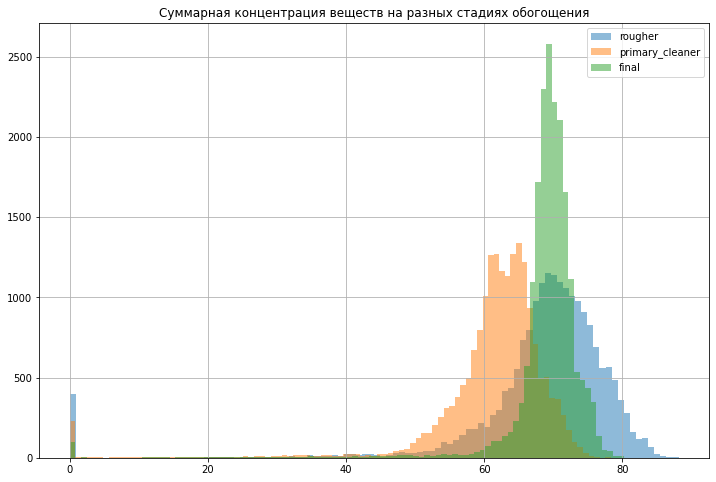

In [22]:
plt.figure (figsize=(12,8))  
plt.hist(data_full['rougher.output.concentrate_all'], bins=100, alpha=0.5, label='rougher')
plt.hist(data_full['primary_cleaner.output.concentrate_all'], bins=100, alpha=0.5, label='primary_cleaner') 
plt.hist(data_full['final.output.concentrate_all'], bins=100, alpha=0.5, label='final') 
plt.title ("Суммарная концентрация веществ на разных стадиях обогощения")
plt.legend()
plt.grid()
plt.show()

На основании полученной гистограммы можно сделать вывод, что на черновом концентрате суммарная концентрация веществ увеличивается (вероятнее всего происходит избавление от пустой породы), а в финальном концентрате суммарная концентрация всех веществ уменьшается, за счёт того, что происходит избавление от лишних примесей. Так же на графике видны аномалии (есть строки с суммарной концентрацией равной 0). Эти анамалии придётся удалить. Помимо этого, чтобы облегчить обучение модели лучше убрать длиныый левый хвост и также почистить значения меньше 40.

In [23]:
def remove_zeros_sum (data):
    data = data.loc[(
    data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] +
    data_full['final.output.concentrate_sol'] + data_full['final.output.concentrate_au'])>40]
    
    data = data.loc[(
    data_full['primary_cleaner.output.concentrate_ag'] + data_full['primary_cleaner.output.concentrate_pb'] +
    data_full['primary_cleaner.output.concentrate_sol'] + data_full['primary_cleaner.output.concentrate_au'])>40]
    
    data = data.loc[(
    data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] +
    data_full['rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au'])>40]
    
    return data

In [24]:
data_train = remove_zeros_sum(data_train)

### Выводы

В данном разделе были проанализированы исходные данные, в частности:

    1. Изучены как меняются концентрации на различных стадиях очистки.
    2. Исследован размер гранул в обучающей и тестовой выборке, на основании полученных результатов были сделаны выводы, что в данном случае можно применять машинное обучение.
    3. Проанализировано как меняется суммарная концентрация веществ на различных этапах очищения, были выявлены аномалии (строки с нулевой концентрацией веществ). Такие строки было принято удалить.

## Модель

### Создание функции для рассчёта итоговой sMAPE

Как отмечалось ранее, учитывая специфику технологического процесса нам необходимо будет использовать метрику учитывающую эффективность модели на стадии флотации и на финальном этапе технологического процесса. Поэтому создадим функцию рассчитывающий данный параметр.

In [25]:
def sMAPE (y, predict_y):
        
        return np.mean((abs(y - predict_y) / ((abs(y)+abs(predict_y))/2))*100)

def resulting_sMAPE (rougher_recovery, predict_rougher_recovery, final_recovery, predict_final_recovery):
       
        
    rougher_sMAPE = sMAPE(rougher_recovery, predict_rougher_recovery)
    final_sMAPE = sMAPE(final_recovery, predict_final_recovery)
    
    return 0.25 * rougher_sMAPE + 0.75 * final_sMAPE

### Обучение модели

#### Выбор целей и признаков

Выделим из тестовой выборки цели, так же для того, чтобы модель мога предсказывать результаты и корректно отработать на тестовой выборке необходимо в качестве признаков оставить только столбцы, которые есть в тестовой выборке.

In [26]:
target_rougher = data_train['rougher.output.recovery'].reset_index(drop=True)
target_final = data_train['final.output.recovery'].reset_index(drop=True)
features = data_train[data_test.columns].reset_index(drop=True)

features = features.drop('date', axis=1)
features_test = data_test.drop('date', axis=1)

print(target_rougher.shape)
print(target_final.shape)
print(features.shape)
print(features_test.shape)

(12913,)
(12913,)
(12913, 52)
(5290, 52)


Для работы с тес товой выборкой нужно будет подобрать соответствующие целевые признаки по строкам в тестовом датасете.

In [27]:
data_list = list(data_test['date'].values)
data_full.index = data_full['date']

rougher_output_recovery_test = data_full.loc[data_list]['rougher.output.recovery']
final_output_recovery_test = data_full.loc[data_list]['final.output.recovery']

#### Dummy модель

Чтобы иметь возможность с чем-то сравнивать нашу модель обучим Dummy модель со стратегией "median".

In [28]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features, target_rougher)
dummy_rougher_pred = dummy_regressor_rougher.predict(data_test.drop('date', axis=1))

dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features, target_final)
dummy_final_pred = dummy_regressor_final.predict(features_test)


In [29]:
resulting_sMAPE (rougher_output_recovery_test, dummy_rougher_pred, 
                 final_output_recovery_test, dummy_final_pred)

9.441981488488604

#### Выбор модели для операции флотации

Подберём модель и гиперпараметры для неё на операции флотации.

<b>Линейная регрессия.</b> Для линейной модели не будем подбирать гиперпараметры, посмотрим какую метрику даст данная модель на кросс-валидации. Для использования нашей метрики в кроссвалидации и GridSerchCV создадим scorer при помощи make_scorer  

In [30]:
scorer = make_scorer(sMAPE, greater_is_better=False)

In [31]:
lin_model = LinearRegression()

- cross_val_score(lin_model, 
                features, 
                target_rougher, 
                cv=5, 
                scoring=scorer).mean()

12.243810864330573

<b>Дерево решений</b>. Подберём гиперпараметры для данной модели при помощи GridSearchCV. 

In [32]:
%%time
tree_model = DecisionTreeRegressor(random_state=123)
tree_param = {'max_depth': range(1,16),
             'min_samples_leaf': range(1,10),
             'max_features': range(1,len(features.columns))}

tree_grid = GridSearchCV(tree_model,
                       tree_param,
                       n_jobs=-1,
                       cv=5,
                        scoring=scorer)

tree_grid.fit(features, target_rougher)

CPU times: total: 51.9 s
Wall time: 10min 23s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': range(1, 16),
                         'max_features': range(1, 52),
                         'min_samples_leaf': range(1, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

Оптимальные параметры для модели решающего дерева:

In [33]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 9}

In [34]:
print(f'Метрика при оптимальных параметрах для решающего дерева: {-tree_grid.best_score_}')

Метрика при оптимальных параметрах для решающего дерева: 10.595102062543384


<b>Случайный лес</b>. Подберём гиперпараметры для данной модели

In [35]:
%%time
forest_model = RandomForestRegressor(random_state=123)
forest_param = {'n_estimators': range(1,1001, 100),
             'max_depth': range(2,16,2)}

forest_grid = GridSearchCV(forest_model,
                       forest_param,
                       n_jobs=-1,
                       cv=5,
                        scoring=scorer)

forest_grid.fit(features, target_rougher)

CPU times: total: 18.1 s
Wall time: 58min 11s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': range(2, 16, 2),
                         'n_estimators': range(1, 1001, 100)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [36]:
forest_grid.best_params_

{'max_depth': 6, 'n_estimators': 101}

In [37]:
print(f'Метрика при оптимальных параметрах для случайного леса: {-forest_grid.best_score_}')

Метрика при оптимальных параметрах для случайного леса: 11.03339531632299


<b>CatBoost</b>. Подберём оптимальное гиперпараметры для данной модели.

In [38]:
%%time
cat_model = CatBoostRegressor(random_seed=123)
cat_param = {'n_estimators': range(1,1001, 50),
             'learning_rate': np.arange(0.01,1,0.05)}

cat_grid = GridSearchCV(cat_model,
                       cat_param,
                       n_jobs=-1,
                       cv=5,
                        scoring=scorer)

cat_grid.fit(features, target_rougher)

0:	learn: 14.0301463	total: 151ms	remaining: 1m 23s
1:	learn: 13.9867342	total: 156ms	remaining: 42.9s
2:	learn: 13.9446804	total: 161ms	remaining: 29.5s
3:	learn: 13.8965977	total: 167ms	remaining: 22.8s
4:	learn: 13.8495527	total: 172ms	remaining: 18.8s
5:	learn: 13.8039300	total: 178ms	remaining: 16.1s
6:	learn: 13.7608673	total: 183ms	remaining: 14.2s
7:	learn: 13.7127721	total: 189ms	remaining: 12.8s
8:	learn: 13.6686797	total: 194ms	remaining: 11.7s
9:	learn: 13.6284906	total: 200ms	remaining: 10.8s
10:	learn: 13.5844013	total: 206ms	remaining: 10.1s
11:	learn: 13.5448199	total: 211ms	remaining: 9.48s
12:	learn: 13.5031255	total: 217ms	remaining: 8.97s
13:	learn: 13.4674220	total: 222ms	remaining: 8.51s
14:	learn: 13.4344801	total: 227ms	remaining: 8.11s
15:	learn: 13.3963480	total: 232ms	remaining: 7.77s
16:	learn: 13.3572118	total: 238ms	remaining: 7.46s
17:	learn: 13.3197549	total: 243ms	remaining: 7.2s
18:	learn: 13.2829916	total: 249ms	remaining: 6.97s
19:	learn: 13.2452410	

170:	learn: 10.4992491	total: 1.16s	remaining: 2.58s
171:	learn: 10.4921925	total: 1.17s	remaining: 2.58s
172:	learn: 10.4796660	total: 1.18s	remaining: 2.57s
173:	learn: 10.4714739	total: 1.18s	remaining: 2.56s
174:	learn: 10.4602116	total: 1.19s	remaining: 2.55s
175:	learn: 10.4513202	total: 1.19s	remaining: 2.54s
176:	learn: 10.4440872	total: 1.2s	remaining: 2.53s
177:	learn: 10.4359262	total: 1.2s	remaining: 2.52s
178:	learn: 10.4284701	total: 1.21s	remaining: 2.52s
179:	learn: 10.4169946	total: 1.22s	remaining: 2.51s
180:	learn: 10.4064131	total: 1.22s	remaining: 2.5s
181:	learn: 10.3949397	total: 1.23s	remaining: 2.49s
182:	learn: 10.3866701	total: 1.24s	remaining: 2.48s
183:	learn: 10.3790669	total: 1.24s	remaining: 2.48s
184:	learn: 10.3718556	total: 1.25s	remaining: 2.47s
185:	learn: 10.3610963	total: 1.25s	remaining: 2.46s
186:	learn: 10.3547951	total: 1.26s	remaining: 2.45s
187:	learn: 10.3496198	total: 1.26s	remaining: 2.44s
188:	learn: 10.3442023	total: 1.27s	remaining: 2.

348:	learn: 9.4040808	total: 2.18s	remaining: 1.26s
349:	learn: 9.4004129	total: 2.19s	remaining: 1.26s
350:	learn: 9.3959124	total: 2.2s	remaining: 1.25s
351:	learn: 9.3931586	total: 2.2s	remaining: 1.24s
352:	learn: 9.3895413	total: 2.21s	remaining: 1.24s
353:	learn: 9.3877699	total: 2.21s	remaining: 1.23s
354:	learn: 9.3854721	total: 2.22s	remaining: 1.22s
355:	learn: 9.3814107	total: 2.22s	remaining: 1.22s
356:	learn: 9.3768771	total: 2.23s	remaining: 1.21s
357:	learn: 9.3716479	total: 2.23s	remaining: 1.2s
358:	learn: 9.3686749	total: 2.24s	remaining: 1.2s
359:	learn: 9.3645602	total: 2.24s	remaining: 1.19s
360:	learn: 9.3618020	total: 2.25s	remaining: 1.18s
361:	learn: 9.3540009	total: 2.25s	remaining: 1.18s
362:	learn: 9.3448962	total: 2.26s	remaining: 1.17s
363:	learn: 9.3422895	total: 2.27s	remaining: 1.16s
364:	learn: 9.3357284	total: 2.27s	remaining: 1.16s
365:	learn: 9.3331589	total: 2.28s	remaining: 1.15s
366:	learn: 9.3279966	total: 2.28s	remaining: 1.14s
367:	learn: 9.32

539:	learn: 8.7304010	total: 3.19s	remaining: 65.1ms
540:	learn: 8.7270911	total: 3.2s	remaining: 59.1ms
541:	learn: 8.7251640	total: 3.21s	remaining: 53.2ms
542:	learn: 8.7226481	total: 3.21s	remaining: 47.3ms
543:	learn: 8.7193785	total: 3.22s	remaining: 41.4ms
544:	learn: 8.7173075	total: 3.22s	remaining: 35.5ms
545:	learn: 8.7109540	total: 3.23s	remaining: 29.5ms
546:	learn: 8.7055819	total: 3.23s	remaining: 23.6ms
547:	learn: 8.7020776	total: 3.24s	remaining: 17.7ms
548:	learn: 8.6992485	total: 3.24s	remaining: 11.8ms
549:	learn: 8.6937536	total: 3.25s	remaining: 5.9ms
550:	learn: 8.6907022	total: 3.25s	remaining: 0us
CPU times: total: 37.1 s
Wall time: 57min 12s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000017F18F1FDF0>,
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                         'n_estimators': range(1, 1001, 50)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [39]:
cat_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 551}

In [40]:
print(f'Метрика при оптимальных параметрах для CatBoost: {-cat_grid.best_score_}')

Метрика при оптимальных параметрах для CatBoost: 10.160706020175123


Лучший показатель метрики на операции флотации дала модель кэтбуста. Посмотрим какой результат мы получим на тестовой выборки для данной операции.

In [58]:
model_float_cat = CatBoostRegressor(random_seed=123, 
                                    verbose=100, 
                                    learning_rate=0.01, 
                                    n_estimators=551)
model_float_cat.fit(features, target_rougher)
predictions = model_float_cat.predict(features_test)
sMAPE(predictions, rougher_output_recovery_test)

0:	learn: 14.0301463	total: 5.66ms	remaining: 3.11s
100:	learn: 11.3473939	total: 514ms	remaining: 2.29s
200:	learn: 10.2453802	total: 1.02s	remaining: 1.77s
300:	learn: 9.6473137	total: 1.56s	remaining: 1.29s
400:	learn: 9.1992788	total: 2.06s	remaining: 770ms
500:	learn: 8.8475067	total: 2.56s	remaining: 256ms
550:	learn: 8.6907022	total: 2.82s	remaining: 0us


8.982034358769747

Выбранная модель с подобранными гиперпараметрами показывает хороший результат на тестовой выборке.

#### Выбор модели для финального перехода

Подберём модель для финального перехода.

<b>Линейная регрессия.</b>

In [42]:
lin_model = LinearRegression()

-cross_val_score(lin_model, 
                features, 
                target_final, 
                cv=5, 
                scoring=scorer).mean()

11.280633783850755

<b>Дерево решений</b>. Подберём гиперпараметры для данной модели при помощи GridSearchCV. 

In [43]:
%%time
tree_model = DecisionTreeRegressor(random_state=123)
tree_param = {'max_depth': range(1,16),
             'min_samples_leaf': range(1,10),
             'max_features': range(1,len(features.columns), 10)}

tree_grid = GridSearchCV(tree_model,
                       tree_param,
                       n_jobs=-1,
                       cv=5,
                        scoring=scorer)

tree_grid.fit(features, target_final)

CPU times: total: 5.67 s
Wall time: 1min 12s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': range(1, 16),
                         'max_features': range(1, 52, 10),
                         'min_samples_leaf': range(1, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [44]:
tree_grid.best_params_

{'max_depth': 1, 'max_features': 51, 'min_samples_leaf': 1}

In [45]:
print(f'Метрика при оптимальных параметрах для решающего дерева: {-tree_grid.best_score_}')

Метрика при оптимальных параметрах для решающего дерева: 9.71838399140338


<b>Случайный лес</b>. Подберём гиперпараметры для данной модели

In [46]:
%%time
forest_model = RandomForestRegressor(random_state=123)
forest_param = {'n_estimators': range(1,1001, 100),
             'max_depth': range(1,16,2)}

forest_grid = GridSearchCV(forest_model,
                       forest_param,
                       n_jobs=-1,
                       cv=5,
                        scoring=scorer)

forest_grid.fit(features, target_final)

CPU times: total: 1min 50s
Wall time: 1h 6min 4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 2),
                         'n_estimators': range(1, 1001, 100)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [47]:
forest_grid.best_params_

{'max_depth': 5, 'n_estimators': 801}

In [48]:
print(f'Метрика при оптимальных параметрах для решающего дерева: {-forest_grid.best_score_}')

Метрика при оптимальных параметрах для решающего дерева: 9.42218452210928


<b>CatBoost</b>. Подберём оптимальное гиперпараметры для данной модели.

In [49]:
%%time
cat_model = CatBoostRegressor(random_seed=123)
cat_param = {'n_estimators': range(1,1001, 50),
             'learning_rate': np.arange(0.01,1,0.05)}

cat_grid = GridSearchCV(cat_model,
                       cat_param,
                       n_jobs=-1,
                       cv=5,
                        scoring=scorer)

cat_grid.fit(features, target_final)

0:	learn: 9.3896697	total: 11ms	remaining: 548ms
1:	learn: 9.2334223	total: 17.1ms	remaining: 419ms
2:	learn: 9.0916975	total: 23.7ms	remaining: 379ms
3:	learn: 8.9655957	total: 30.1ms	remaining: 354ms
4:	learn: 8.8451274	total: 36.5ms	remaining: 336ms
5:	learn: 8.7300510	total: 41.9ms	remaining: 314ms
6:	learn: 8.6324788	total: 47.7ms	remaining: 300ms
7:	learn: 8.5290732	total: 53.6ms	remaining: 288ms
8:	learn: 8.4447754	total: 59.3ms	remaining: 277ms
9:	learn: 8.3616173	total: 66.6ms	remaining: 273ms
10:	learn: 8.2812382	total: 73.6ms	remaining: 268ms
11:	learn: 8.2055609	total: 79.6ms	remaining: 259ms
12:	learn: 8.1453450	total: 86.6ms	remaining: 253ms
13:	learn: 8.0820030	total: 92.4ms	remaining: 244ms
14:	learn: 8.0148527	total: 98.5ms	remaining: 237ms
15:	learn: 7.9598782	total: 105ms	remaining: 229ms
16:	learn: 7.9096439	total: 110ms	remaining: 221ms
17:	learn: 7.8541829	total: 116ms	remaining: 212ms
18:	learn: 7.8086008	total: 123ms	remaining: 206ms
19:	learn: 7.7594508	total: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000017F18C801F0>,
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                         'n_estimators': range(1, 1001, 50)},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [50]:
cat_grid.best_params_

{'learning_rate': 0.060000000000000005, 'n_estimators': 51}

In [51]:
print(f'Метрика при оптимальных параметрах для CatBoost: {-cat_grid.best_score_}')

Метрика при оптимальных параметрах для CatBoost: 8.970859559447733


Лучший показатель для финального перехода также даёт модель кэтбуста. Посмотрим её результаты на тестовой выборке

In [64]:
model_final_cat = CatBoostRegressor(random_seed=123, 
                                    verbose=100, 
                                    learning_rate=0.06, 
                                    n_estimators=51)
model_final_cat.fit(features, target_final)
predictions = model_final_cat.predict(features_test)
sMAPE(predictions, final_output_recovery_test)

0:	learn: 9.3896697	total: 5.61ms	remaining: 281ms
50:	learn: 7.0396961	total: 260ms	remaining: 0us


9.10847628772065

Данные на тесте незначительно хуже, чем на выборке (около 0,13), тем не менее этот результат лучше чем у друших моделей.

#### Финальная модель

Финальная модель будет состоять из двух моделей, метрику по ним мы будем смотреть объединённую, которая будет рассчитываться при помощи функции написаной выше.

Обучим модель для операции флотации.

In [65]:
model_float_cat = CatBoostRegressor(random_seed=123, 
                                    verbose=100, 
                                    learning_rate=0.01, 
                                    n_estimators=551)
model_float_cat.fit(features, target_rougher)
predictions_float = model_float_cat.predict(features_test)

0:	learn: 14.0301463	total: 6.33ms	remaining: 3.48s
100:	learn: 11.3473939	total: 509ms	remaining: 2.27s
200:	learn: 10.2453802	total: 1.05s	remaining: 1.83s
300:	learn: 9.6473137	total: 1.57s	remaining: 1.31s
400:	learn: 9.1992788	total: 2.07s	remaining: 776ms
500:	learn: 8.8475067	total: 2.58s	remaining: 257ms
550:	learn: 8.6907022	total: 2.82s	remaining: 0us


Обучим модель для финального перехода

In [66]:
model_final_cat = CatBoostRegressor(random_seed=123, 
                                    verbose=100, 
                                    learning_rate=0.06, 
                                    n_estimators=51)
model_final_cat.fit(features, target_final)
predictions_final = model_final_cat.predict(features_test)

0:	learn: 9.3896697	total: 5.62ms	remaining: 281ms
50:	learn: 7.0396961	total: 260ms	remaining: 0us


Рассчитаем итоговый показатель для данной операции.

In [68]:
resulting_sMAPE (rougher_output_recovery_test, predictions_float, 
                 final_output_recovery_test, predictions_final)

9.076865805482925

Итоговая метрика оказалась лучше чем метрика у модели, которая использовала стратегию предсказания по медиане (9.44).

### Выводы

В данном разделе была написана функция для вычисления итогового значение sMAPE обучены разные модели и выбрана та, которая даёт лучший результат. На тестовой выборке значение итогового sMAPE получилось равным 9.07. Это лучше чем результат dummy модели со стратегией предсказания по медиане

## Общие выводы

В ходе данного исследования была проведена следующая работа:

    1. Открыты и изучены исходные данные, проведена предобработка данных. Было установленно, что эффективнеость обогощения рассчитана правилльно и данный показатель можно использовать прямо из исходного датасета.
    2. Изучено как меняются концентрации металлов на различных стадиях очистки. Исследован размер гранул в обучающей и тестовой выборке, на основании полученных результатов были сделаны выводы, что в данном случае можно применять машинное обучение, поскольку данные тестовой и обучающей выборки сопостовимы. Проанализировано как меняется суммарная концентрация веществ на различных этапах очищения, были выявлены аномалии (строки с нулевой концентрацией веществ). Такие строки было принято удалить.
    3. Создана функция для рассчёта итогового sMAPE. Обучена модель, которая позволяет получить значение указанной метрики равной 9.07, что лучше чем у модели, которая делает предсказания по медиане.